 # <span style="color:GREEN; font-weight:bold;">Training a Machine Learning Model for Hate Speech Detection</span>


 # <span style="color:GREEN; font-weight:bold;">Import the Necessary Library</span>


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_files
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

 # <span style="color:GREEN; font-weight:bold;">Load the Dataset</span>


In [26]:
# Load the dataset
df = pd.read_csv(r'C:\Users\kames\OneDrive\Desktop\infoysproject\dataset\Preprocessed_Dataset.csv')
df


,Text,Label
0,total energy so renewable energy in the countr...,0.0
1,haha you got owned bitch,1.0
2,greetings hello there i what a slut wondering ...,0.0
3,thanks for your reply now that you mention it ...,0.0
4,islams you mother f ers,1.0
...,...,...
180697,finally time to do your job shonen shirley giv...,0.0
180698,also make the following defamatory attack on m...,0.0
180699,remove moshe bargain he is hebrew not kurdish,0.0
180700,wrong this article is called circumcision beca...,0.0


 # <span style="color:GREEN; font-weight:bold;">Vectorize the Feature</span>


In [ ]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)


# Apply the vectorizer to the 'text' column
X = vectorizer.fit_transform(df['Text'])

# Get the labels (assuming the 'label' column is your target)
y = df['Label']

 # <span style="color:GREEN; font-weight:bold;">Train Test Split</span>


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # <span style="color:GREEN; font-weight:bold;"> Using a Pipeline for Hate Speech Detection</span>


In [11]:
pipe_lr = Pipeline([('lr', LogisticRegression())])
pipe_nb = Pipeline([('nb', MultinomialNB())])
pipe_rf = Pipeline([('rf', RandomForestClassifier(n_estimators=100, random_state=42))])


In [12]:
pipe_lr.fit(X_train, y_train)



c:\Users\kames\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('lr', LogisticRegression())])

In [13]:
pipe_nb.fit(X_train, y_train)


Pipeline(steps=[('nb', MultinomialNB())])

In [14]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

 # <span style="color:GREEN; font-weight:bold;">Models Prediction For Testing Dataset</span>


In [ ]:

y_pred_lr = pipe_lr.predict(X_test)
y_pred_nb = pipe_nb.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)



 # <span style="color:GREEN; font-weight:bold;"> Classification Report For Logistic Regression</span>


In [20]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84     20206
         1.0       0.80      0.78      0.79     15935

    accuracy                           0.81     36141
   macro avg       0.81      0.81      0.81     36141
weighted avg       0.81      0.81      0.81     36141



 # <span style="color:GREEN; font-weight:bold;"> Confusion Matix for Logistic Regression</span>


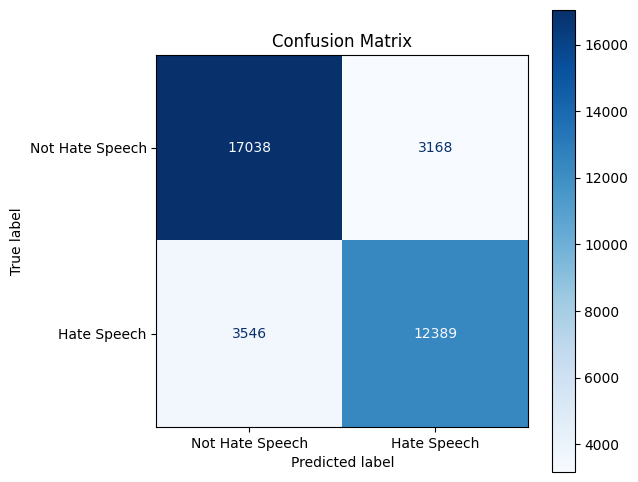

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Visualize the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Hate Speech', 'Hate Speech'])
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.title("Confusion Matrix")
plt.show()


 # <span style="color:GREEN; font-weight:bold;"> Classification Report For Naive Bayes </span>


In [21]:
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80     20206
         1.0       0.74      0.80      0.77     15935

    accuracy                           0.79     36141
   macro avg       0.78      0.79      0.78     36141
weighted avg       0.79      0.79      0.79     36141



 # <span style="color:GREEN; font-weight:bold;">Confusion matrix for Naive Bayers</span>


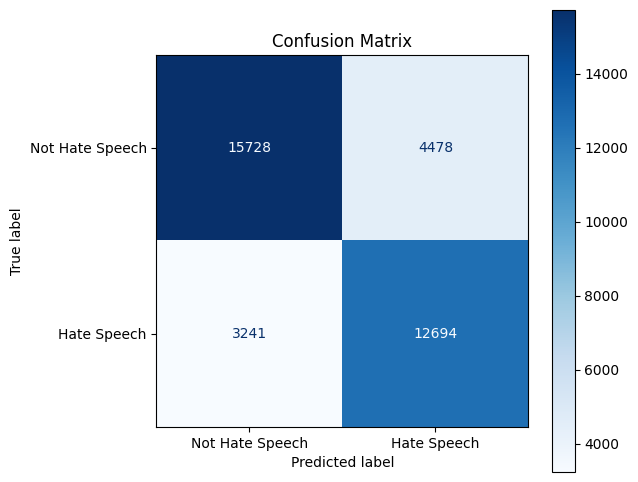

In [ ]:

cm = confusion_matrix(y_test, y_pred_nb)

# Visualize the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Hate Speech', 'Hate Speech'])
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.title("Confusion Matrix")
plt.show()


 # <span style="color:GREEN; font-weight:bold;"> Classification Report For Random Forest</span>


In [22]:
print("random forest:")
print(classification_report(y_test, y_pred_rf))

random forest:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     20206
         1.0       0.80      0.75      0.77     15935

    accuracy                           0.81     36141
   macro avg       0.81      0.80      0.80     36141
weighted avg       0.81      0.81      0.81     36141



 # <span style="color:GREEN; font-weight:bold;"> Confusion Matrix For Random Forest</span>


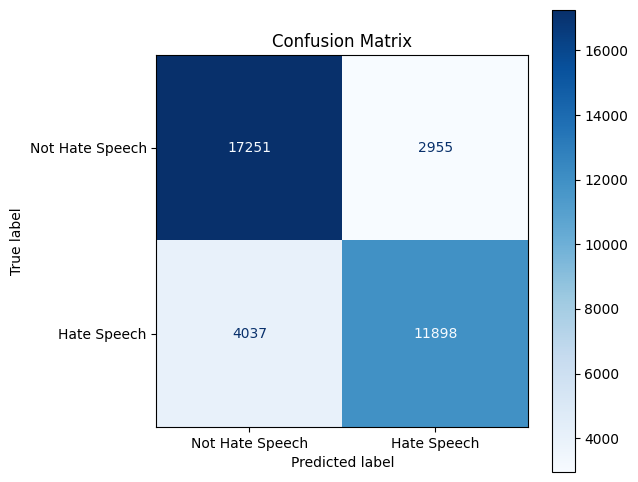

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Hate Speech', 'Hate Speech'])
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.title("Confusion Matrix")
plt.show()
